# Classification Shap

In [1]:
from BorutaShap import BorutaShap, load_data

X, y = load_data(data_type='classification')
X.head()

C:\Users\Retro\anaconda3\envs\boruta_main\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:28<00:00,  1.13it/s]

22 attributes confirmed important: ['mean radius', 'mean compactness', 'worst area', 'mean smoothness', 'mean texture', 'worst texture', 'mean concavity', 'worst concavity', 'mean concave points', 'worst perimeter', 'worst smoothness', 'mean perimeter', 'worst fractal dimension', 'worst compactness', 'mean area', 'concavity error', 'radius error', 'worst symmetry', 'worst concave points', 'worst radius', 'perimeter error', 'area error']
7 attributes confirmed unimportant: ['texture error', 'compactness error', 'smoothness error', 'symmetry error', 'mean symmetry', 'fractal dimension error', 'mean fractal dimension']
1 tentative attributes remains: ['concave points error']


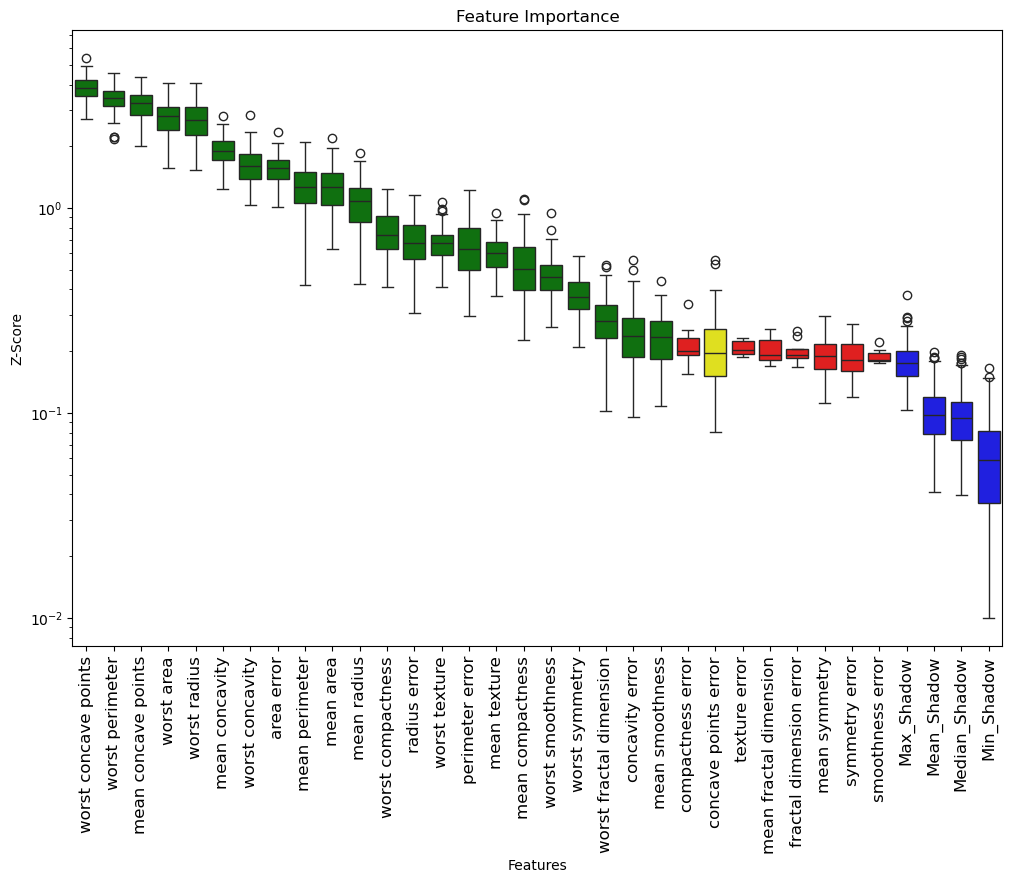

In [3]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [4]:
# as 3 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

1 tentative features are now accepted: ['concave points error']
0 tentative features are now rejected: []


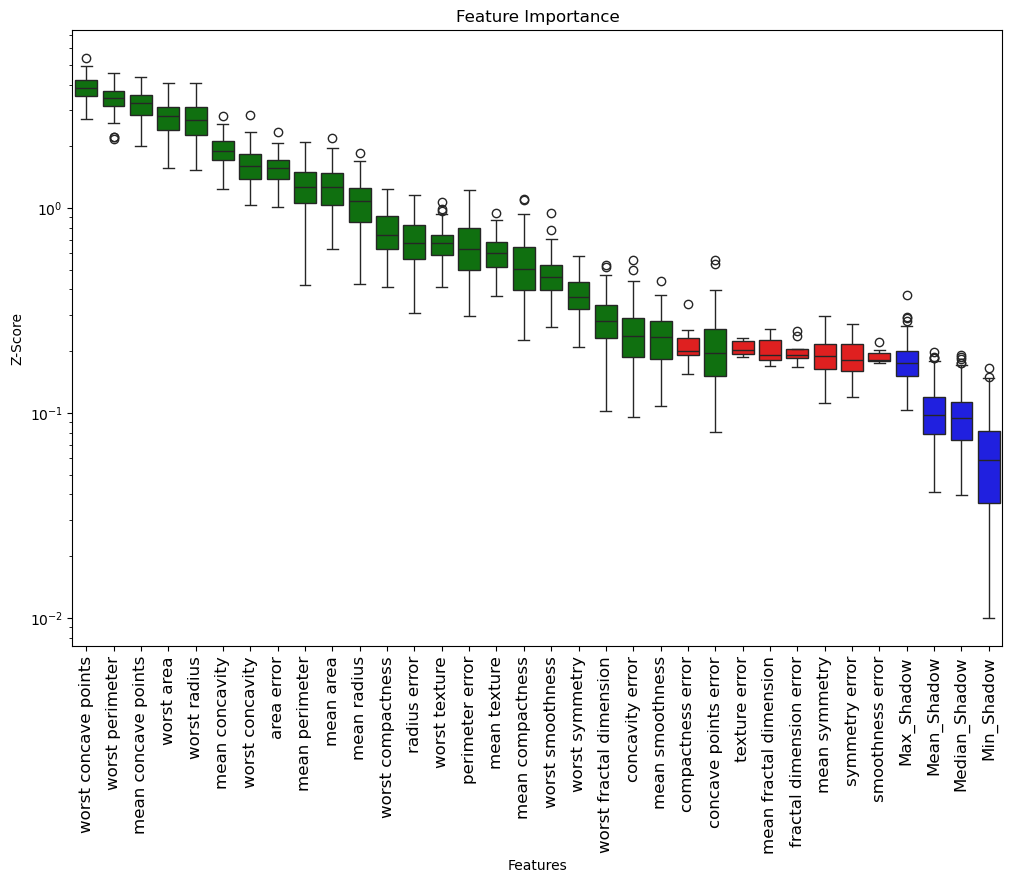

In [5]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [6]:
# Returns a subset of the original data with the selected features
subset = Feature_Selector.Subset()
subset.head()

,mean radius,mean compactness,worst area,mean smoothness,mean texture,worst texture,mean concavity,worst concavity,mean concave points,worst perimeter,...,worst compactness,mean area,concavity error,radius error,worst symmetry,worst concave points,worst radius,perimeter error,area error,concave points error
0,17.99,0.27760,2019.0,0.11840,10.38,17.33,0.3001,0.7119,0.14710,184.60,...,0.6656,1001.0,0.05373,1.0950,0.4601,0.2654,25.38,8.589,153.40,0.01587
1,20.57,0.07864,1956.0,0.08474,17.77,23.41,0.0869,0.2416,0.07017,158.80,...,0.1866,1326.0,0.01860,0.5435,0.2750,0.1860,24.99,3.398,74.08,0.01340
2,19.69,0.15990,1709.0,0.10960,21.25,25.53,0.1974,0.4504,0.12790,152.50,...,0.4245,1203.0,0.03832,0.7456,0.3613,0.2430,23.57,4.585,94.03,0.02058
3,11.42,0.28390,567.7,0.14250,20.38,26.50,0.2414,0.6869,0.10520,98.87,...,0.8663,386.1,0.05661,0.4956,0.6638,0.2575,14.91,3.445,27.23,0.01867
4,20.29,0.13280,1575.0,0.10030,14.34,16.67,0.1980,0.4000,0.10430,152.20,...,0.2050,1297.0,0.05688,0.7572,0.2364,0.1625,22.54,5.438,94.44,0.01885


# Classification Shap Sampling

In [7]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0, sample=True)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.90it/s]

23 attributes confirmed important: ['mean radius', 'mean compactness', 'worst area', 'mean smoothness', 'mean texture', 'concave points error', 'worst texture', 'mean concavity', 'worst concavity', 'mean concave points', 'worst perimeter', 'worst smoothness', 'mean perimeter', 'worst fractal dimension', 'worst compactness', 'mean area', 'concavity error', 'radius error', 'worst symmetry', 'worst concave points', 'worst radius', 'perimeter error', 'area error']
7 attributes confirmed unimportant: ['texture error', 'compactness error', 'smoothness error', 'symmetry error', 'mean symmetry', 'fractal dimension error', 'mean fractal dimension']
0 tentative attributes remains: []


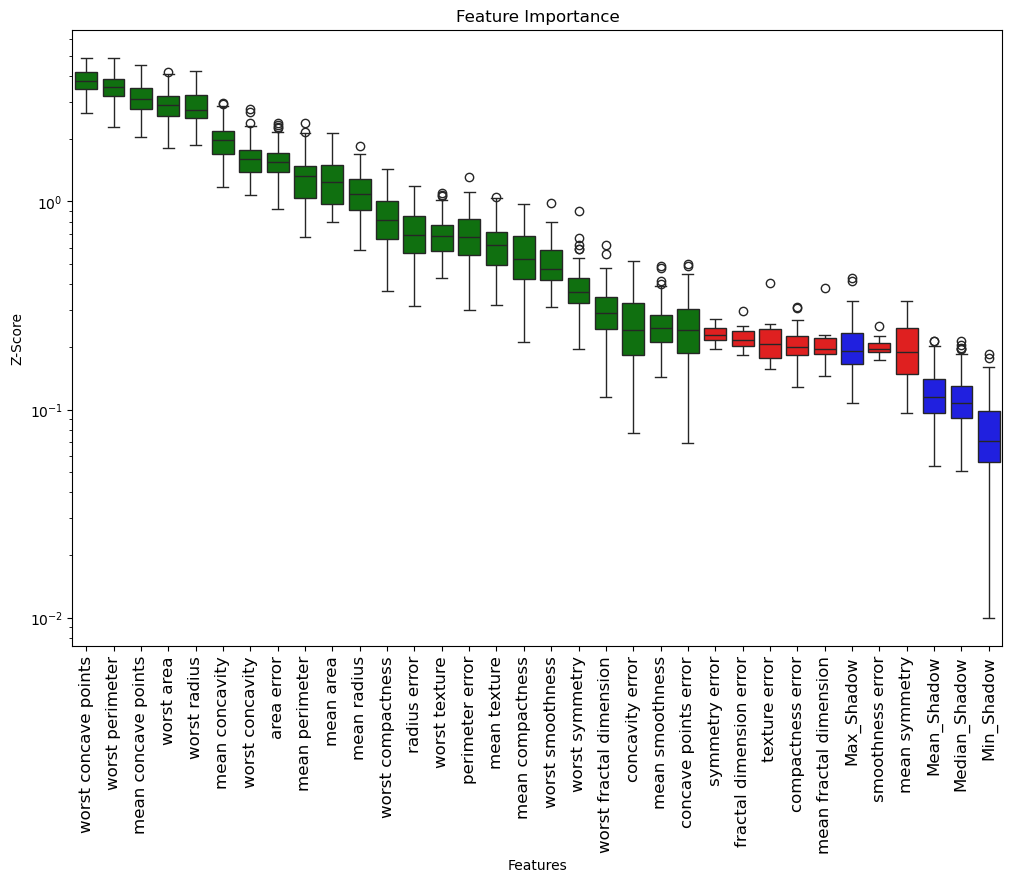

In [8]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [9]:
# as 4 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

0 tentative features are now accepted: []
0 tentative features are now rejected: []


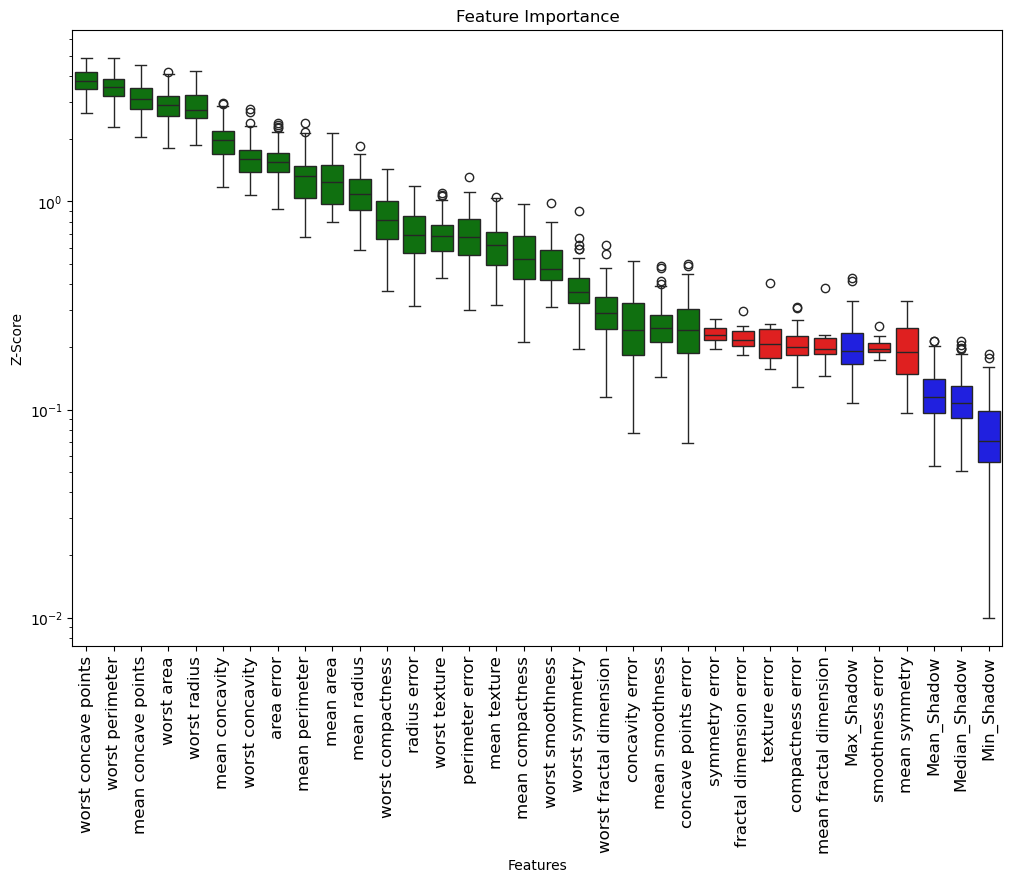

In [10]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

# Classification Gini

In [11]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='gini',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.36it/s]

22 attributes confirmed important: ['mean radius', 'mean compactness', 'worst area', 'mean texture', 'concave points error', 'worst texture', 'mean concavity', 'worst concavity', 'mean concave points', 'worst perimeter', 'worst smoothness', 'mean perimeter', 'worst fractal dimension', 'worst compactness', 'mean area', 'concavity error', 'radius error', 'worst symmetry', 'worst concave points', 'worst radius', 'perimeter error', 'area error']
6 attributes confirmed unimportant: ['texture error', 'smoothness error', 'symmetry error', 'mean symmetry', 'fractal dimension error', 'mean fractal dimension']
2 tentative attributes remains: ['mean smoothness', 'compactness error']


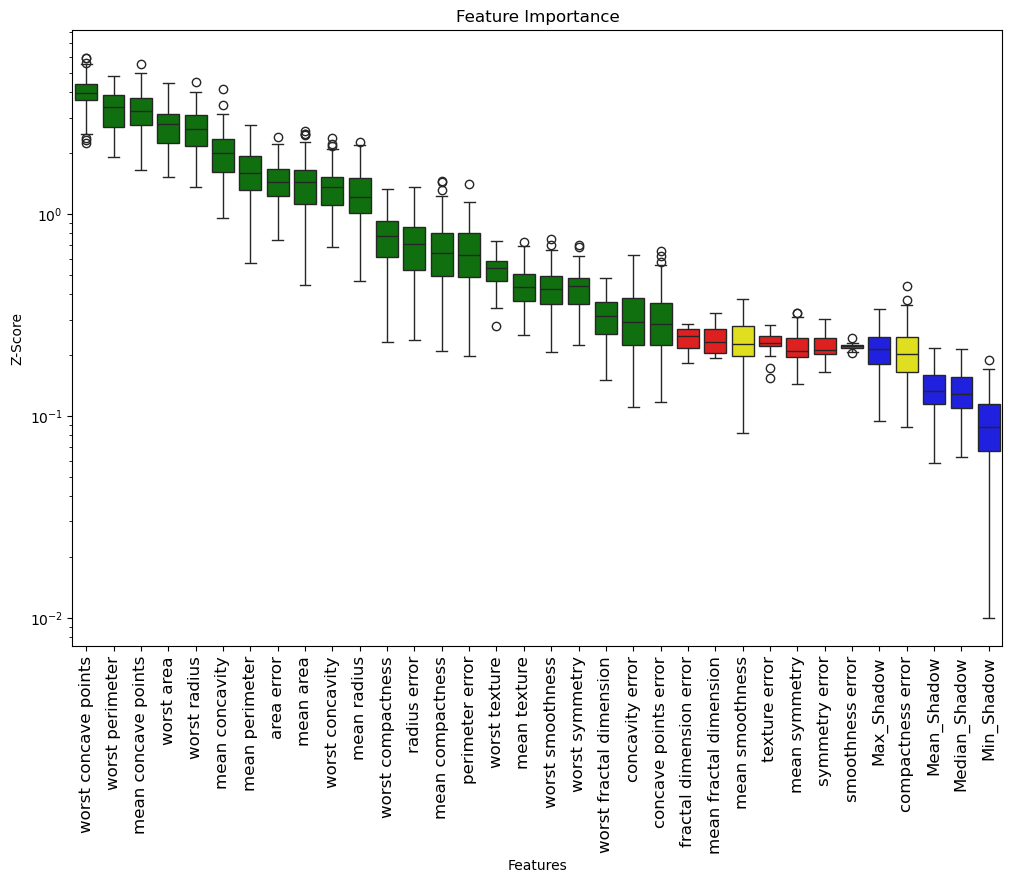

In [12]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [13]:
# as 2 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

1 tentative features are now accepted: ['mean smoothness']
1 tentative features are now rejected: ['compactness error']


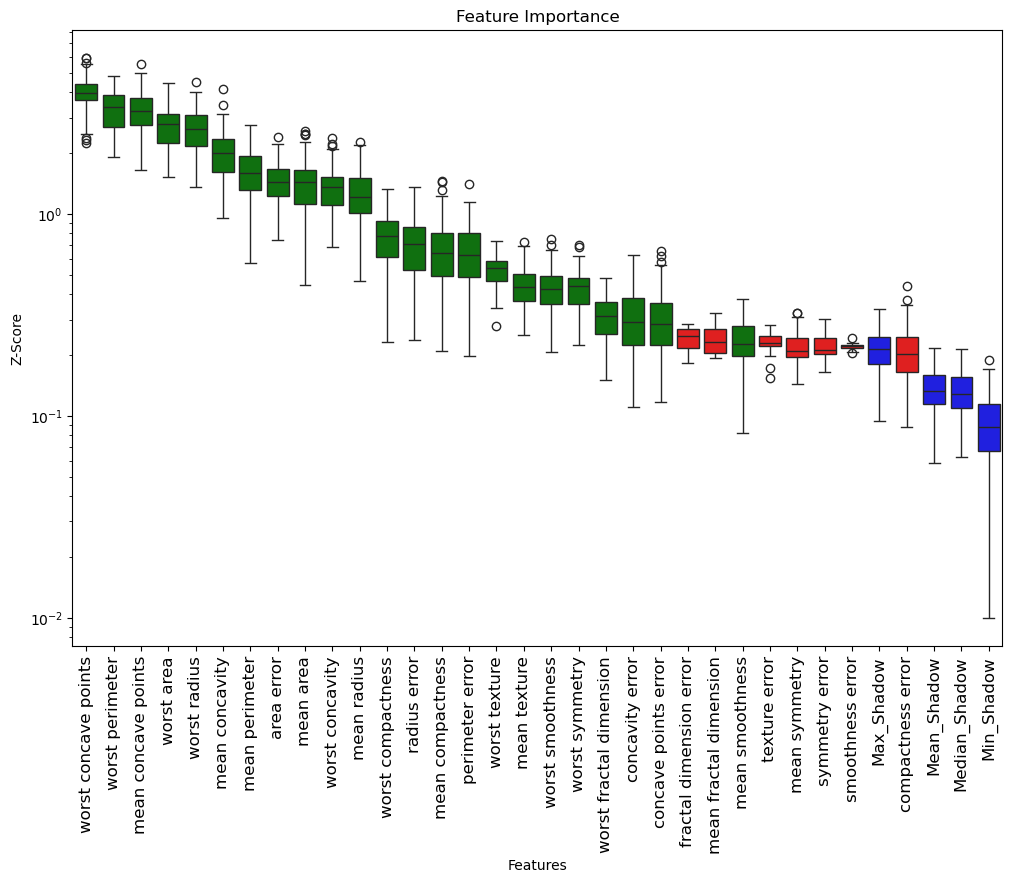

In [14]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')